In [3]:
#maite's branch file

In [4]:
#Importing dependencies and setup
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

#import spotify keys
from config import client_id
from config import client_secret

In [5]:
#from: https://stmorse.github.io/journal/spotify-api.html

AUTH_URL = 'https://accounts.spotify.com/api/token'

# POST
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

In [6]:
#from: https://stmorse.github.io/journal/spotify-api.html

#base URL for Spotify API
base_url = 'https://api.spotify.com/v1/'

#In order to access, we send a properly formed GET request to the API server, with our access_token in the header. Let’s save this header info now, in the following very specific format:
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [7]:
#import global top songs csv
global_songs_df = pd.read_csv("resources/global-weekly-2022-06-02.csv")

#extracting track id (removing "spotify:track:")
track_id_series = global_songs_df.uri.str[14:]

#convert to df and rename column
track_id_df = track_id_series.to_frame().rename(columns={"uri":"track_id"})

#merge dfs
cleaned_global_df = global_songs_df.merge(track_id_df, how="inner", left_index=True, right_index=True)

#pare down columns
cleaned_global_df = cleaned_global_df[["rank", "track_id", "artist_names", "track_name", "peak_rank", "previous_rank", "weeks_on_chart", "streams"]]
cleaned_global_df.head()

,rank,track_id,artist_names,track_name,peak_rank,previous_rank,weeks_on_chart,streams
0,1,4Dvkj6JhhA12EX05fT7y2e,Harry Styles,As It Was,1,1,9,60420855
1,2,6Sq7ltF9Qa7SNFBsV5Cogx,"Bad Bunny, Chencho Corleone",Me Porto Bonito,2,4,4,39026161
2,3,3k3NWokhRRkEPhCzPmV8TW,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,3,3,4,37623538
3,4,75FEaRjZTKLhTrFGsfMUXR,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,4,-1,1,32763806
4,5,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Tití Me Preguntó,5,9,4,31126704


In [8]:
#empty lists to store song data
danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []
id_num = []
track_href = []
analysis_url = []
duration_mins = []
time_signature = []

In [9]:
for t in cleaned_global_df["track_id"]:
    response = requests.get(base_url + 'audio-features/' + t, headers=headers).json()
    
    #fill in track info for each audio feature / empty list
    danceability.append(response["danceability"])
    energy.append(response["energy"])
    key.append(response["key"])
    loudness.append(response["loudness"])
    mode.append(response["mode"])
    speechiness.append(response["speechiness"])
    acousticness.append(response["acousticness"])
    instrumentalness.append(response["instrumentalness"])
    liveness.append(response["liveness"])
    valence.append(response["valence"])
    tempo.append(response["tempo"])
    id_num.append(response["id"])
    track_href.append(response["track_href"])
    analysis_url.append(response["analysis_url"])    
    #duration recorded in api in milliseconds, converting to minutes here
    duration_mins.append(round((response["duration_ms"] / 60000),2))
    time_signature.append(response["time_signature"])
    

In [10]:
songs_dict = {
    "track_id": id_num,
    "danceability": danceability,
    "energy": energy,
    "key": key,
    "loudness": loudness,
    "mode": mode,
    "speechiness": speechiness,
    "acousticness": acousticness,
    "instrumentalness": instrumentalness,
    "liveness": liveness,
    "valence": valence,
    "tempo": tempo,
    "duration_mins": duration_mins,
    "time_signature": time_signature,
    "track_href": track_href,
    "analysis_url": analysis_url
    
}

song_info_df = pd.DataFrame(songs_dict)
song_info_df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,time_signature,track_href,analysis_url
0,4Dvkj6JhhA12EX05fT7y2e,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,2.79,4,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,https://api.spotify.com/v1/audio-analysis/4Dvk...
1,6Sq7ltF9Qa7SNFBsV5Cogx,0.911,0.712,1,-5.105,0,0.0817,0.0901,0.000027,0.0933,0.425,92.005,2.98,4,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,https://api.spotify.com/v1/audio-analysis/6Sq7...
2,3k3NWokhRRkEPhCzPmV8TW,0.647,0.686,3,-5.745,0,0.0413,0.0800,0.000001,0.5280,0.268,79.928,4.30,4,https://api.spotify.com/v1/tracks/3k3NWokhRRkE...,https://api.spotify.com/v1/audio-analysis/3k3N...
3,75FEaRjZTKLhTrFGsfMUXR,0.629,0.547,10,-13.123,0,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4.98,4,https://api.spotify.com/v1/tracks/75FEaRjZTKLh...,https://api.spotify.com/v1/audio-analysis/75FE...
4,1IHWl5LamUGEuP4ozKQSXZ,0.650,0.715,5,-5.198,0,0.2530,0.0993,0.000291,0.1260,0.187,106.672,4.06,4,https://api.spotify.com/v1/tracks/1IHWl5LamUGE...,https://api.spotify.com/v1/audio-analysis/1IHW...


In [11]:
full_track_data = cleaned_global_df.merge(song_info_df, how='inner', on="track_id")

In [12]:
full_track_data.head()

,rank,track_id,artist_names,track_name,peak_rank,previous_rank,weeks_on_chart,streams,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,time_signature,track_href,analysis_url
0,1,4Dvkj6JhhA12EX05fT7y2e,Harry Styles,As It Was,1,1,9,60420855,0.520,0.731,...,0.0557,0.3420,0.001010,0.3110,0.662,173.930,2.79,4,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,https://api.spotify.com/v1/audio-analysis/4Dvk...
1,2,6Sq7ltF9Qa7SNFBsV5Cogx,"Bad Bunny, Chencho Corleone",Me Porto Bonito,2,4,4,39026161,0.911,0.712,...,0.0817,0.0901,0.000027,0.0933,0.425,92.005,2.98,4,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,https://api.spotify.com/v1/audio-analysis/6Sq7...
2,3,3k3NWokhRRkEPhCzPmV8TW,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,3,3,4,37623538,0.647,0.686,...,0.0413,0.0800,0.000001,0.5280,0.268,79.928,4.30,4,https://api.spotify.com/v1/tracks/3k3NWokhRRkE...,https://api.spotify.com/v1/audio-analysis/3k3N...
3,4,75FEaRjZTKLhTrFGsfMUXR,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,4,-1,1,32763806,0.629,0.547,...,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4.98,4,https://api.spotify.com/v1/tracks/75FEaRjZTKLh...,https://api.spotify.com/v1/audio-analysis/75FE...
4,5,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Tití Me Preguntó,5,9,4,31126704,0.650,0.715,...,0.2530,0.0993,0.000291,0.1260,0.187,106.672,4.06,4,https://api.spotify.com/v1/tracks/1IHWl5LamUGE...,https://api.spotify.com/v1/audio-analysis/1IHW...


In [13]:
temp_songs_df = full_track_data[["rank", "artist_names", "track_name", "weeks_on_chart", "streams", "danceability", "energy", "liveness"]]
temp_songs_df

,rank,artist_names,track_name,weeks_on_chart,streams,danceability,energy,liveness
0,1,Harry Styles,As It Was,9,60420855,0.520,0.731,0.3110
1,2,"Bad Bunny, Chencho Corleone",Me Porto Bonito,4,39026161,0.911,0.712,0.0933
2,3,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,4,37623538,0.647,0.686,0.5280
3,4,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,1,32763806,0.629,0.547,0.0604
4,5,Bad Bunny,Tití Me Preguntó,4,31126704,0.650,0.715,0.1260
...,...,...,...,...,...,...,...,...
195,196,"David Guetta, Becky Hill, Ella Henderson",Crazy What Love Can Do,4,5568564,0.601,0.713,0.1580
196,197,Tones And I,Dance Monkey,148,5556591,0.824,0.587,0.1490
197,198,Olivia Rodrigo,favorite crime,48,5552673,0.369,0.272,0.1470
198,199,"Blessd, Justin Quiles, Lenny Tavárez",Medallo,28,5552315,0.787,0.700,0.6630


In [14]:
new_songs_df = temp_songs_df.set_index('rank')

In [15]:
n_songs_df = new_songs_df.rename(columns={"artist_names":"Artist Names", "track_name":"Track Name", "weeks_on_chart":"Weeks on Chart"})

In [16]:
#Scatterplot for songs and danceability
danceability_df = n_songs_df[["Artist Names", "Track Name", "danceability"]]
danceability_df

,Artist Names,Track Name,danceability
rank,,,
1,Harry Styles,As It Was,0.520
2,"Bad Bunny, Chencho Corleone",Me Porto Bonito,0.911
3,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,0.647
4,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,0.629
5,Bad Bunny,Tití Me Preguntó,0.650
...,...,...,...
196,"David Guetta, Becky Hill, Ella Henderson",Crazy What Love Can Do,0.601
197,Tones And I,Dance Monkey,0.824
198,Olivia Rodrigo,favorite crime,0.369


In [17]:
dance_df = danceability_df.reset_index

In [18]:
dance_df()

,rank,Artist Names,Track Name,danceability
0,1,Harry Styles,As It Was,0.520
1,2,"Bad Bunny, Chencho Corleone",Me Porto Bonito,0.911
2,3,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,0.647
3,4,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,0.629
4,5,Bad Bunny,Tití Me Preguntó,0.650
...,...,...,...,...
195,196,"David Guetta, Becky Hill, Ella Henderson",Crazy What Love Can Do,0.601
196,197,Tones And I,Dance Monkey,0.824
197,198,Olivia Rodrigo,favorite crime,0.369
198,199,"Blessd, Justin Quiles, Lenny Tavárez",Medallo,0.787


The r-squared is: 0.01012627312644543


FileNotFoundError: [Errno 2] No such file or directory: 'images/duration_streams.png'

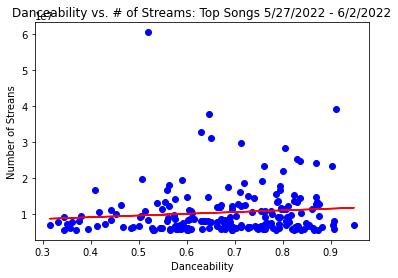

In [19]:
xvalues = full_track_data["danceability"]
yvalues = full_track_data["streams"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalues, yvalues, c="b")
plt.plot(xvalues,regress_values,"r-")
# Set a Title and labels
plt.title("Danceability vs. # of Streams: Top Songs 5/27/2022 - 6/2/2022")
plt.xlabel("Danceability")
plt.ylabel("Number of Streans")
#adding line equation to the scatter plot
plt.annotate(line_eq,(4.5,50000000),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

#save as png
plt.savefig("images/duration_streams.png")